# Fourier Transform


Press et. al. (1992) introduce the Fourier Transform as follows:

A physical process can be described either in the *time domain*, by the values of some quantity $h$ as a function of time $t$, or else in the *frequency domain*, where the process is specified by giving its amplitude $H$ (generally a complex number indicating phase also) as a function of frequency $f$, with $-\infty\lt f \lt \infty$. For many purposes it is useful to think of $h(t)$ and $H(f)$ as being two different *representations* of the *same* function. One goes back and forth between these two representations by means of the **Fourier transform** equations:
$$ H(f) = \int_{-\infty}^{\infty} h(t) \exp{\{2 \pi i f t\}} dt $$
$$ h(t) = \int_{-\infty}^{\infty} H(f) \exp{\{-2 \pi i f t\}} dt $$
Sometimes, $f$ is replaced by the angular frequency $w = 2 \pi f$.


With two functions $h(t)$ and $g(t)$, and their corresponding Fourier transforms $H(f)$ and $G(f)$, the *convolution* and *correlation* combinations are formed.

#### Convolution
$$ g \ast h \equiv \int_{-\infty}^{\infty} g(\tau) h(t - \tau) d\tau$$

Convolution Theorem: $g \ast h \equiv G(f)H(f)$.

#### Correlation
$$ Corr(g, h) = \int_{-\infty}^{\infty} g(\tau + t) h(\tau) d\tau$$

Correlation Theorem: $Corr(g, h) \equiv G(f)H(-f)$.

The correlation of one function with itself is called its *autocorrelation*: $Corr(g, g) \equiv |G(f)|^2$, (Wiener-Khinchin Theorem).

##### Parseval's Theorem
$$Total Power \equiv \int_{-\infty}^{\infty} |h(t)|^2 dt = \int_{-\infty}^{\infty} |H(f)|^2 dt$$



## Discrete Fourier Transform (DFT)
The Fourier transform is estimated from a finite number of sampled points.

Suppose we have $N$ consecutive sampled values
$$h_k = h(t_k), \quad t_k = k\Delta, \quad k = 0, 1, 2, \dots, N - 1$$
where $\Delta$ is the sampling interval. The sampled datapoints are supposed to give a "typical" representation of what $h(t)$ looks like.

Then, the **DFT** of the $N$ points $h_k$ is:
$$H(f_n) = \Delta \sum_{k=0}^{N-1}h_k \exp{\{\frac{2 \pi i k n}{N}\}}$$
$$H_n = \sum_{k=0}^{N-1}h_k \exp{\{\frac{2 \pi i k n}{N}\}}$$

The **Inverse DFT** is given by:
$$h_k = \frac{1}{N} \sum_{n=0}^{N-1} H_n \exp{\{\frac{-2 \pi i k n}{N}\}}$$

## Fast Fourier Transform (FFT)
Fast algorithm to compute the Fourier transform in $O(N \log_2 N)$.

## Notes on Fourier Transform
- Each element of the output of a DFT is a complex number, thus to display it as an image, the absolute value of the output is taken.
- The output frequency domain image tells us how much each frequency component is included in the original image.
    - **Lower frequency components** (larger values) result in brighter pixels.
        - They appear in the original image as the *rough shapes* of large objects.
    - **Higher frequency components** (lower values) result in less bright pixels.
        - They appear in the original image to add *details*, such as textures. Small objects and edges of objects are mainly made of this frequency.
    - If pixels near the center are brighter, then the original image is composed with more lower frequency components than higher frequency components.



Taken from: https://medium.com/@y1017c121y/python-computer-vision-tutorials-image-fourier-transform-part-1-4e91e4e74724

## Applications of Fourier Transform

**1. Low Pass Filters**

   This process involves removing the higher frequency components from the frequency domain and then apply Inverse Fourier Transform. This returns the blurred original image.
   
   
**2. Shift Estimation**

   Through comparison of two images' Fourier transforms, it is possible to determine how much and in what direction the images are shifted.

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

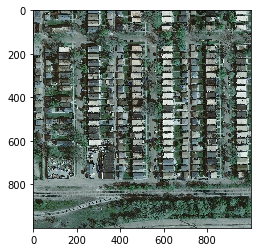

In [14]:
img = cv2.imread('chicago.jpg')

img_blue_channel = img[:, :, 2]
plt.imshow(img)

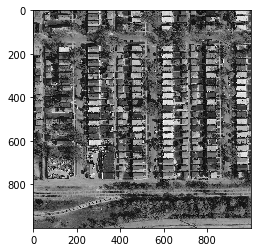

In [18]:
plt.imshow(img_blue_channel, cmap='gray')

# DFT

In [19]:
# DFT
f = cv2.dft(np.float32(img_blue_channel), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:, :, 0] + 1j * f_shift[:, :, 1]
f_abs = np.abs(f_complex) + 1
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)

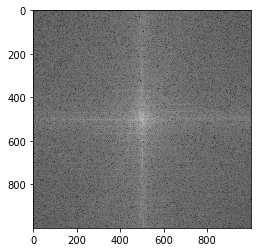

In [21]:
plt.imshow(f_img, cmap='gray')

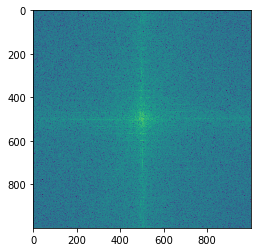

In [22]:
plt.imshow(f_img)

From the images we can conclude that the original image contained more high frequency components than low frequency components, because there are few bright pixels.

# Low-pass filter

In [26]:
img = cv2.imread('chicago.jpg')[:, :, 0]

r = 50
ham = np.hamming(1000)[:, None]
ham2d = np.sqrt(np.dot(ham, ham.T)) ** r

In [27]:
f = cv2.dft(img.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shifted = np.fft.fftshift(f) # recenter the image
f_complex = f_shifted[:, :, 0] * 1j + f_shifted[:, :, 1]
f_filtered = ham2d * f_complex

In [28]:
f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted)
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = 255 * filtered_img / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

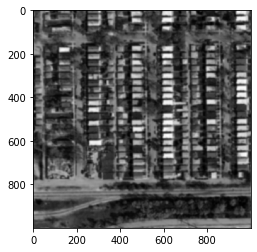

In [29]:
plt.imshow(filtered_img, cmap='gray')

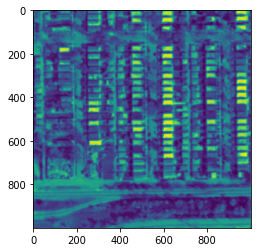

In [34]:
plt.imshow(filtered_img)

This process is an easy way to remove noise from the image.

# Image Euclidean Distance (IMED)

In [50]:
from math import pow, sqrt, exp, fabs, pi

In [45]:
def pixel_distance(p1, p2):
    
    x1, y1 = p1
    x2, y2 = p2
    
    return sqrt( pow(x1 - x2, 2) + pow(y1 - y2, 2) )

In [55]:
def imed(img1, img2):
    
    assert img1.shape == img2.shape, 'The images must have the same shape.'
    
    sum = 0
    
    width, height = img1.shape
    
    MN = img1.size
    
    img1_flattened = np.reshape(img1, (MN, -1))
    img2_flattened = np.reshape(img2, (MN, -1))
    
    for i in range(MN):
        
        pix_diff_i = img1_flattened[i] - img2_flattened[i]
        
        k_i = i // width
        l_i = i - k_i * width
        pix1 = img1[k_i, l_i]
        
        for j in range(MN):
            
            pix_diff_j = img1_flattened[j] - img2_flattened[j]
            
            k_j = j // width
            l_j = j - k_j * width
            pix2 = img2[k_j, l_j]
            
            pix_distance = pixel_distance((k_i, l_i), (k_j, l_j))
            pix_distance = abs(pix_distance)
            pix_distance = -pow(pix_distance, 2)
            pix_distance = exp(pix_distance / 2)
            
            sum += (pix_distance * pix_diff_i * pix_diff_j)
            
    return sum / (2 * pi)
            

In [ ]:
cb = cv2.imread('chessBoard_2^7')[:, :, 2]

imed(cb, cb)

## References

Press, William, Teukolsky, Saul, Vetterling, William & Flannery, Brian. 1992. Numerical recipes in C: the art of scientific computing,  2nd Edition. Cambridge University Press. 